# Working with Millions of Rows in Datasets

Data can grow and get very large. In the real world, many of us won't be working with small datasets like titanic or boston housing that we use on online courses and classes. An important skill any analyst or scientist should know is working with datasets that have millions of rows of data. Not just the basic Boston Housing datasets or Titanic. There are many things to watch for such RAM memory, CPU storage, and the operations you run on the dataset which can be computationally expensive. 


In order to demonstrate the differences when working with the large datasets, I downloaded two datasets from NYC OpenData, one is a 15.5 GB dataset containing 27.2 M rows about 311 Service Requests and the other is 400 MB dataset containing 1.8 M rows about NYC car crashes. 

They can be downloaded here.

- Service Requests. - https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
- Motor Vehicle Crashes. - https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


In [13]:
#import some packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os, sys
import psutil

In [2]:
#let's look at the size of the Service Requests file

path = '/Users/matthew_macwan/Downloads/CIS/Big_Data/ServiceRequests_311.csv'

stats = os.stat(path)
print('File Size:', stats.st_size, 'bytes')

File Size: 15580346648 bytes


In [3]:
#let's look at the size of the Collision Crashes file

path = '/Users/matthew_macwan/Downloads/CIS/Big_Data/Motor_Vehicle_Collisions_Crashes.csv'

stats = os.stat(path)
print('File Size:', stats.st_size, 'bytes')

File Size: 396898084 bytes


In [4]:
psutil.virtual_memory()

svmem(total=8589934592, available=5695758336, percent=33.7, used=2471702528, free=3150237696, active=965853184, inactive=2517954560, wired=1505849344)

We can see that I do not have enough memory to compute the service requests file and the collision crashes file will take up alot of my available memory. Pandas works well with small to medium size datasets which makes it a great choice for that. However, large datasets can be too big for your memory and can cause a crash. Sometimes, you'll have enough memory to load in a large dataset but running computations will cause an out of memory error. 

We will look at two Python libraries for dealing with large datasets. They are the following:

   - Datatable 
   - Dask 

### Using Datatable Library

In [5]:
import datatable as dt 

In [6]:
#load the collision_crashes.csv with Datatable

file = '/Users/matthew_macwan/Downloads/CIS/Big_Data/Motor_Vehicle_Collisions_Crashes.csv'

%time data = dt.fread(file)
data.head()

CPU times: user 4.69 s, sys: 484 ms, total: 5.18 s
Wall time: 2 s


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,…,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,04/14/2021,5:32,,NA,NA,NA,,BRONX WHITESTONE BRIDGE,,,…,Sedan,Sedan,,,
1,04/13/2021,21:35,BROOKLYN,11217,40.6836,−73.9762,"(40.68358, -73.97617)",,,620 ATLANTIC AVENUE,…,Sedan,,,,
2,04/15/2021,16:15,,NA,NA,NA,,HUTCHINSON RIVER PARKWAY,,,…,Station Wagon/Sport Utility Vehicle,,,,
3,04/13/2021,16:00,BROOKLYN,11222,NA,NA,,VANDERVORT AVENUE,ANTHONY STREET,,…,Sedan,,,,
4,04/12/2021,8:25,,NA,0,0,"(0.0, 0.0)",EDSON AVENUE,,,…,Station Wagon/Sport Utility Vehicle,Sedan,,,
5,04/13/2021,17:11,,NA,NA,NA,,VERRAZANO BRIDGE UPPER,,,…,Sedan,Box Truck,,,
6,04/13/2021,17:30,QUEENS,11106,NA,NA,,33 st,31ave,,…,Sedan,Sedan,,,
7,04/16/2021,23:30,,NA,NA,NA,,SHORE PARKWAY,,,…,Sedan,,,,
8,04/11/2021,17:00,,NA,NA,NA,,GOWANUS RAMP,,,…,Sedan,Sedan,,,


In [7]:
#loading in the collision_crashes.csv with regular pandas

%time df = pd.read_csv(file)
df.head()

/Users/matthew_macwan/opt/anaconda3/lib/python3.8/site-packages/decorator.py:231: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  return caller(func, *(extras + args), **kw)


CPU times: user 8.01 s, sys: 748 ms, total: 8.75 s
Wall time: 9.13 s


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


As you can see, the datatable read function is many times faster than regular pandas. This runtime becomes more and more important as the size of the data grows. 

 - Datatable Run Time : 2 s

 - Pandas Run Time : 9.13 s

If you would like to continue working with pandas, I will show a function that allows for you to reduce memory usage of your dataframe.

In [8]:
#let's work with the datatable library right now, convert our loaded data to a pandas dataframe

%time datapandas = data.to_pandas()

CPU times: user 5 s, sys: 684 ms, total: 5.68 s
Wall time: 5.31 s


In [9]:
datapandas.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [10]:
type(datapandas)

pandas.core.frame.DataFrame

In [11]:
#add underscores to spaces in column names

datapandas.columns = datapandas.columns.str.replace(' ','_')

In [12]:
#let's run some computations on the data

#FIND THE MAX FOR NUMBER OF PEOPLE KILLED IN A SINGLE COLLISION CRASH

%time datapandas.NUMBER_OF_PERSONS_KILLED.max()

CPU times: user 6.79 ms, sys: 2.01 ms, total: 8.79 ms
Wall time: 7.78 ms


8.0

In [13]:
#FIND THE ZIP CODE THAT HAS THE CRASHES WITH HIGHEST NUMBER OF INJURIES

%time datapandas.groupby("ZIP_CODE").NUMBER_OF_PERSONS_INJURED.count()

CPU times: user 63.5 ms, sys: 9.24 ms, total: 72.7 ms
Wall time: 74.4 ms


ZIP_CODE
10000.0      352
10001.0    14851
10002.0    13617
10003.0     9242
10004.0     2153
           ...  
11692.0     1704
11693.0     1678
11694.0     1883
11695.0       14
11697.0      165
Name: NUMBER_OF_PERSONS_INJURED, Length: 231, dtype: int64

In [14]:

#If you want to use pandas from the beginning instead, find how much memory each column uses and see if you can reduce that

#let's see which columns use up the most memory in the regular pandas dataframe we loaded in earlier

memory_usage = df.memory_usage(deep=True) / 1024 ** 2

memory_usage.head(7)

Index           0.000122
CRASH DATE    117.928194
CRASH TIME    108.675997
BOROUGH        95.813611
ZIP CODE       67.293591
LATITUDE       14.080978
LONGITUDE      14.080978
dtype: float64

In [15]:
memory_usage.sum()

1839.0976467132568

In [16]:
#here's a function that can reduce the memory size of your dataframe by making the dtypes of a dataframe the smallest possible unit

def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [17]:
#run the function

reduced_df = reduce_memory_usage(df, verbose=True)

Mem. usage decreased to 285.14 Mb (30.2% reduction)


### Using Dask Library

In [1]:
import dask.dataframe as dd

In [2]:
file = '/Users/matthew_macwan/Downloads/CIS/Big_Data/Motor_Vehicle_Collisions_Crashes.csv'

%time df = dd.read_csv(file,dtype={'NUMBER OF PERSONS INJURED': float,'NUMBER OF PERSONS KILLED': float,'ZIP CODE':object})

CPU times: user 28 ms, sys: 5.98 ms, total: 34 ms
Wall time: 38.3 ms


In [20]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 29 entries, CRASH DATE to VEHICLE TYPE CODE 5
dtypes: object(18), float64(4), int64(7)

In [21]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [22]:
#add underscores to spaces in column names

df.columns = df.columns.str.replace(' ','_')

In [23]:
df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'],
      dtype='object')

In [24]:
df

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
npartitions=7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,float64,float64,object,object,object,object,float64,float64,int64,int64,int64,int64,int64,int64,object,object,object,object,object,int64,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [25]:
df.head()

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [26]:
#let's run some computations

%time df.NUMBER_OF_PERSONS_KILLED.max().compute()

CPU times: user 11 s, sys: 2.04 s, total: 13.1 s
Wall time: 9.72 s


8.0

In [27]:
df.groupby("BOROUGH").COLLISION_ID.count().compute().sort_values()

BOROUGH
STATEN ISLAND     53705
BRONX            185261
MANHATTAN        293147
QUEENS           341651
BROOKLYN         401550
Name: COLLISION_ID, dtype: int64

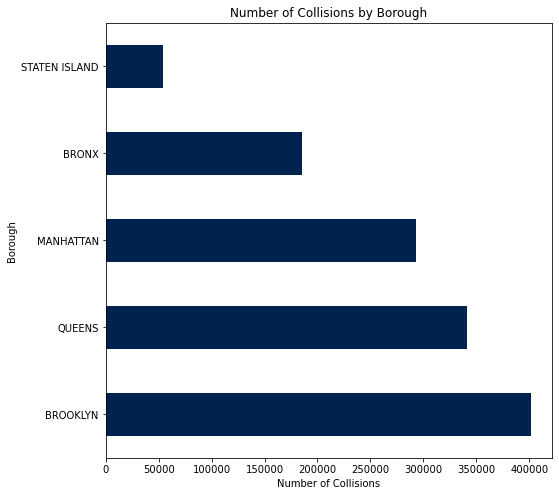

In [28]:
#Graph the data 

graph = df.groupby("BOROUGH").COLLISION_ID.count()

#Plot 

graph.nlargest(5).compute().\
plot(kind='barh', stacked=False, figsize=[8,8], colormap='cividis')
 
plt.title('Number of Collisions by Borough')
plt.ylabel('Borough')
plt.xlabel('Number of Collisions')
plt.show()

In [29]:
%time df.groupby("ZIP_CODE").NUMBER_OF_PERSONS_INJURED.count().compute().sort_values()

CPU times: user 10.2 s, sys: 1.6 s, total: 11.8 s
Wall time: 7.24 s


ZIP_CODE
10166        1
10055        1
10176        1
11241        1
10179        2
         ...  
10019    16040
11203    16161
11236    16687
11101    17303
11207    23966
Name: NUMBER_OF_PERSONS_INJURED, Length: 232, dtype: int64

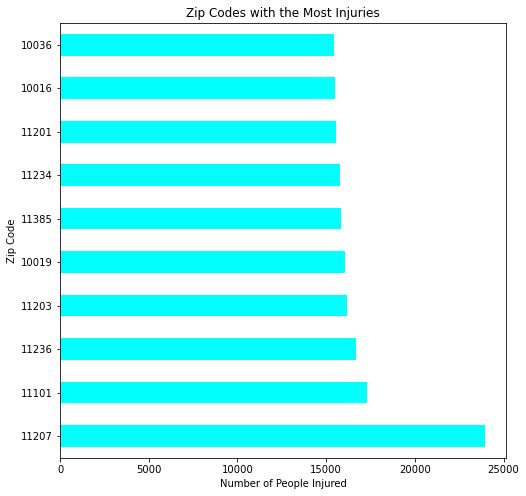

In [30]:
#Graph the data

graph_1 = df.groupby("ZIP_CODE").NUMBER_OF_PERSONS_INJURED.count()

#Plot

graph_1.nlargest(10).compute().\
plot(kind='barh', stacked=False, figsize=[8,8], colormap='cool')
 
plt.title('Zip Codes with the Most Injuries')
plt.ylabel('Zip Code')
plt.xlabel('Number of People Injured')
plt.show()

In [31]:
df.groupby("BOROUGH").NUMBER_OF_PERSONS_INJURED.mean().compute()

BOROUGH
BRONX            0.301053
BROOKLYN         0.306094
MANHATTAN        0.188344
QUEENS           0.276747
STATEN ISLAND    0.263625
Name: NUMBER_OF_PERSONS_INJURED, dtype: float64

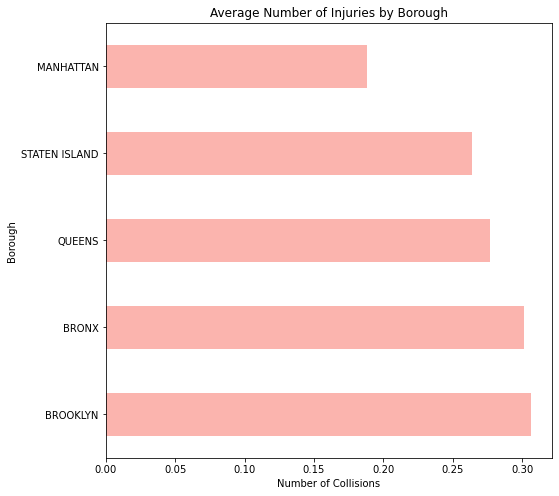

In [32]:
#Graph the data

graph_2 = df.groupby("BOROUGH").NUMBER_OF_PERSONS_INJURED.mean()

graph_2.nlargest(5).compute().\
plot(kind='barh', stacked=False, figsize=[8,8], colormap='Pastel1')

#Plot
 
plt.title('Average Number of Injuries by Borough')
plt.ylabel('Borough')
plt.xlabel('Number of Collisions')
plt.show()

You can see the difference in the computation runtimes between the Datatable library and the Dask library.

MAX NUMBER OF PEOPLE KILLED COMPUTATION 

   - Datatable Run Time: 8.9 ms
   - Dask Run Time: 9 s
   
ZIP CODE WITH THE MOST INJURIES COMPUTATION 

   - Datatable Run Time: 72.7 ms
   - Dask Run Time: 11.8 s
   
It comes down to a preference choice of which library to use when the dataset is only a couple million rows. Let's see if that changes when the runtime differences with a 15 GB, 27M row dataset.

In [36]:
### Loading in the Service Requests File with Datatable 

path = '/Users/matthew_macwan/Downloads/CIS/Big_Data/ServiceRequests_311.csv'

%time sr_df = dt.fread(path)

CPU times: user 2min 41s, sys: 1min 18s, total: 3min 59s
Wall time: 3min 48s


In [4]:
### Datatable to a Pandas Dataframe 

# %time sr_df = sr_df.to_pandas()


#KERNEL DIED - meaning it ran out of RAM 

In [5]:

dtypes = {'Incident Zip': str,'Unique Key':str,'Agency': str,'Agency Name':str,'Complaint Type': str, 'Descriptor':str,
          'Location Type': str,'Latitude':float,'Longitude': float, 'Incident Address':str, 'Open Data Channel Type':str,
          'Open Data Channel Type':str, 'Park Facility Name': str, 'Park Borough': str,'Vehicle Type': str, 'Taxi Company Borough': str,
         'Road Ramp':str, 'Bridge Highway Direction': str, 'Bridge Highway Name': str,'Taxi Pick Up Location': str,
          'Bridge Highway Segment': str, 'Facility Type':str,'Landmark':str,'Resolution Description':str, 'Due Date':str}

In [6]:
### Loading in the Service Requests File with Dask 

path = '/Users/matthew_macwan/Downloads/CIS/Big_Data/ServiceRequests_311.csv'

%time sr_df = dd.read_csv(path,dtype=dtypes)

CPU times: user 49.2 ms, sys: 6.79 ms, total: 56 ms
Wall time: 60.5 ms


- We can see that as the dataset grows larger and larger, dask is still able load the data in at very fast speeds while the the datatable library gives a memory error. 
 

In [6]:
sr_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15648000,01/04/2010 06:36:30 AM,01/12/2010 09:20:06 AM,DOT,Department of Transportation,Street Condition,Failed Street Repair,Street,10016,166 EAST 35 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746721,-73.978440,"(40.74672110332963, -73.9784399460149)"
1,15648003,01/04/2010 11:18:54 AM,01/26/2010 05:51:42 PM,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,11210,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.621887,-73.946968,"(40.621886929021045, -73.94696794642002)"
2,15648004,01/04/2010 03:18:20 PM,01/05/2010 09:30:22 AM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,10003,746 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730150,-73.992766,"(40.73015008038426, -73.99276579207472)"
3,15648009,01/05/2010 12:49:24 AM,01/06/2010 12:59:49 PM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10003,100 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732400,-73.987844,"(40.73240036503256, -73.9878439553108)"
4,15648010,01/05/2010 01:31:35 AM,01/06/2010 12:59:48 PM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Car Service Company Complaint,Street,11219,5802 13 AVENUE,...,NaN,BROOKLYN,NaN,NaN,NaN,NaN,NaN,40.629897,-73.997464,"(40.629897451400446, -73.99746372472059)"


In [7]:
#add underscores to spaces in column names

sr_df.columns = sr_df.columns.str.replace(' ','_')

In [14]:
#let's run some computations

#FIND WHAT THE MAIN COMPLAINTS ARE CITYWIDE

%time sr_df.groupby("Complaint_Type").Unique_Key.count().compute().sort_values()

/Users/matthew_macwan/opt/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (11,12,13,14,15,16,40) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 6min 31s, sys: 1min 3s, total: 7min 34s
Wall time: 5min 26s


Complaint_Type
Meals Home Delivery Required            1
Misc. Comments'(select*from...          1
Misc. Comments'&quot;`0&amp...          1
Misc. Comments' waitfor del...          1
Misc. Comments' and 7702=77...          1
                                   ...   
Street Condition                  1084050
Blocked Driveway                  1175906
Illegal Parking                   1398544
HEAT/HOT WATER                    1563436
Noise - Residential               2556518
Name: Unique_Key, Length: 474, dtype: int64

/Users/matthew_macwan/opt/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (11,12,13,14,15,16,40) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


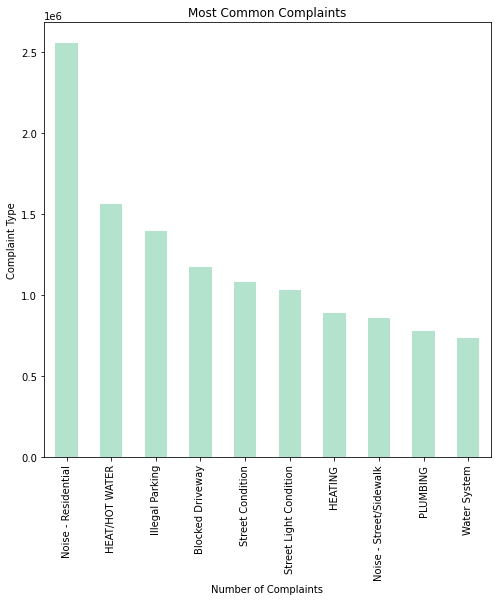

In [15]:
#Graph the data

graph_1 = sr_df.groupby("Complaint_Type").Unique_Key.count()

#Plot

graph_1.nlargest(10).compute().\
plot(kind='bar', stacked=False, figsize=[8,8], colormap='Pastel2')
 
plt.title('Most Common Complaints')
plt.ylabel('Complaint Type')
plt.xlabel('Number of Complaints')
plt.show()

In [16]:
### USING an API to get data 

#Sometimes, we only need a part of the dataset and we don't want to download an entire huge dataset and then have to load it into memory.
#An API can be very useful and both of these datasets have their API information listed on the links above.

import requests

#grabbing only 5 columns and limiting it to the first 15000 rows

api = 'https://data.cityofnewyork.us/resource/erm2-nwe9.json?$select=unique_key,incident_zip,complaint_type,longitude,latitude&$limit=10000'   

r = requests.get(url = api) 

# extracting data in json format 
data = r.json() 
  

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(data)

In [17]:
results_df.shape

(10000, 5)

In [18]:
results_df.head()

,unique_key,incident_zip,complaint_type,longitude,latitude
0,41586477,11361,Graffiti,-73.77585495252744,40.75476673729396
1,43965653,11207,Day Care,-73.89996311713381,40.66708148016959
2,43965655,11377,Noise - Street/Sidewalk,-73.90338918538406,40.745595681752405
3,25496160,NaN,Benefit Card Replacement,NaN,NaN
4,45850152,11204,For Hire Vehicle Complaint,-73.9842616252167,40.60756751748548


Running computations on the dataset even after specifying datatypes took almost 8 minutes to run. However, we do see that Noise Complaints are the top complaints in NYC, illegal parking, hot water and heat also are among the top 5.




Important Side Notes 

 - specifying dtypes helps load in data quicker
 - grab only the columns from the API if the dataset is huge, many datasets such as this one have an API which you can call
 - If building models, grab only a sample of the entire dataset, its distribution will likely be the same as the total dataset